In [1]:
import pandas as pd

In [27]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2019-01-18 21:29:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  24.7KB/s    in 0.8s    

2019-01-18 21:29:52 (24.7 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [28]:
df = pd.read_csv('cell_samples.csv')

In [29]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
df.Class.unique()

array([2, 4])

In [31]:
df.isna().any()

ID             False
Clump          False
UnifSize       False
UnifShape      False
MargAdh        False
SingEpiSize    False
BareNuc        False
BlandChrom     False
NormNucl       False
Mit            False
Class          False
dtype: bool

In [32]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [33]:
df.BareNuc.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [34]:
df.shape

(699, 11)

In [35]:
import numpy as np

In [36]:
df[['BareNuc']] = df[['BareNuc']].replace('?',np.nan)

In [37]:
df.isna().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [38]:
df.dropna(axis = 0,inplace = True)

In [39]:
df.isna().any()

ID             False
Clump          False
UnifSize       False
UnifShape      False
MargAdh        False
SingEpiSize    False
BareNuc        False
BlandChrom     False
NormNucl       False
Mit            False
Class          False
dtype: bool

In [40]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [41]:
df[['BareNuc']] = df[['BareNuc']].astype('int')

In [42]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [43]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [44]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [45]:
Y = df[['Class']]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [48]:
from sklearn.svm import SVC

In [49]:
suppvect = SVC()

In [50]:
suppvect.fit(train_x,train_y)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
pred = suppvect.predict(test_x)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
cm = confusion_matrix(pred,test_y)

In [54]:
print(classification_report(test_y,pred))

             precision    recall  f1-score   support

          2       0.99      0.91      0.95        82
          4       0.89      0.98      0.93        55

avg / total       0.95      0.94      0.94       137



In [55]:
print(cm)

[[75  1]
 [ 7 54]]


In [56]:
import seaborn as sn

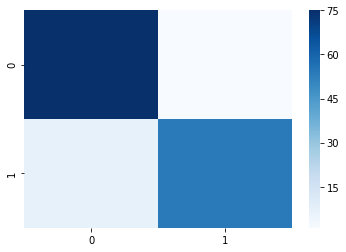

In [60]:
sn.heatmap(cm,cmap = 'Blues')

In [67]:
test_y = test_y.values

In [69]:
ctr = 0
for i in range(len(pred)):
    if test_y[i]==pred[i]:
        ctr+=1

In [71]:
acc = ctr/len(pred)

In [74]:
print('Accuracy is : ',acc*100,'%')

Accuracy is :  94.16058394160584 %
